In [1]:
# Instalasi library jika belum ada (jalankan baris ini jika di Google Colab)
# !pip install xgboost scikit-learn pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Model & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Evaluasi Metrik (Sesuai Proposal Bab 3.1)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Konfigurasi plot
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

print("Library berhasil dimuat.")

Library berhasil dimuat.


Ukuran Dataset Train: (21263, 82)
Ukuran Dataset Unique: (21263, 88)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1


Jumlah Fitur (X): 81
Target (y): critical_temp


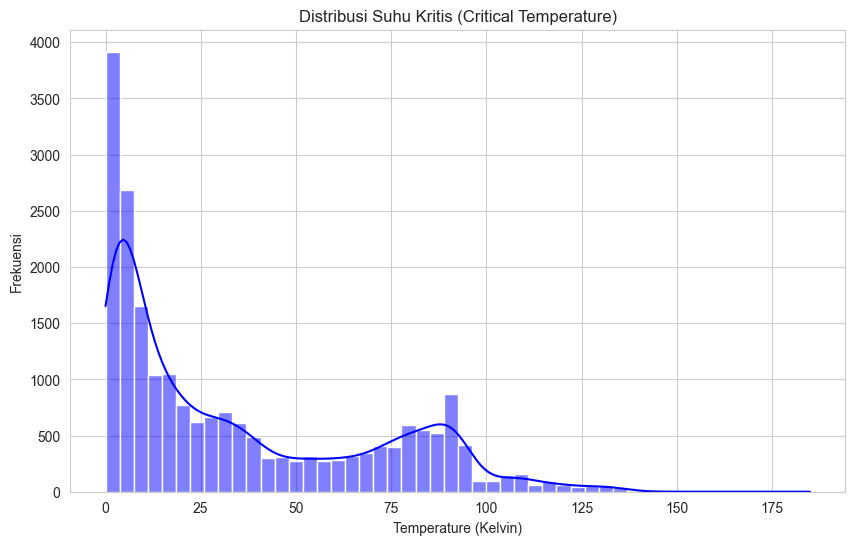

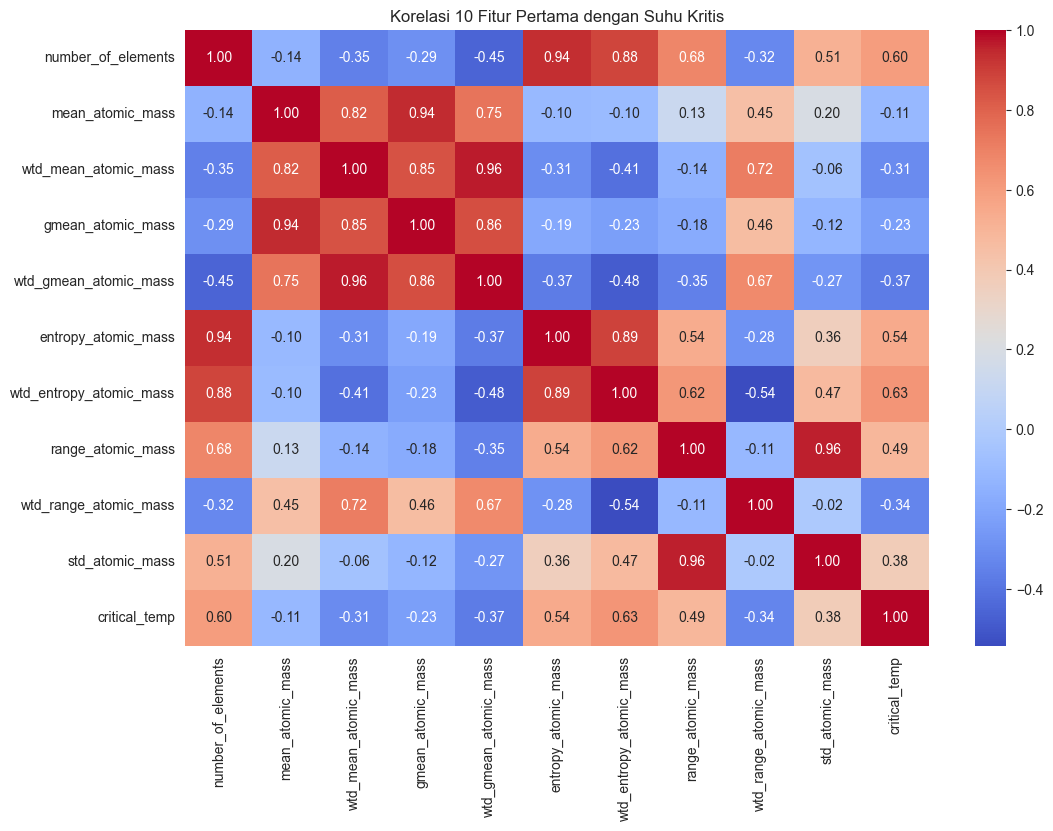

In [2]:
# --- 1. Memuat Data ---
df_train = pd.read_csv('train.csv')
df_unique = pd.read_csv('unique_m.csv')

print(f"Ukuran Dataset Train: {df_train.shape}")
print(f"Ukuran Dataset Unique: {df_unique.shape}")

# Cek 5 baris pertama
display(df_train.head())

# --- 2. Pengecekan Target & Fitur ---
# Kita pisahkan Fitur (X) dan Target (y)

X = df_train.drop(['critical_temp'], axis=1)
y = df_train['critical_temp']

print(f"\nJumlah Fitur (X): {X.shape[1]}")
print(f"Target (y): critical_temp")

# --- 3. Visualisasi Distribusi Target (Eksplorasi Awal) ---
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=50, kde=True, color='blue')
plt.title('Distribusi Suhu Kritis (Critical Temperature)')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Frekuensi')
plt.show()

# --- 4. Cek Korelasi (Sampel Fitur Utama) ---
# Mengambil 10 fitur pertama untuk melihat korelasi dengan target
cols_to_check = list(X.columns[:10]) + ['critical_temp']
corr_matrix = df_train[cols_to_check].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi 10 Fitur Pertama dengan Suhu Kritis')
plt.show()

In [3]:
# --- 1. Split Data (80% Train, 20% Test) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data Training: {X_train.shape}")
print(f"Data Testing : {X_test.shape}")

# --- 2. Normalisasi (StandardScaler) ---
scaler = StandardScaler()

# Fit pada training set, lalu transform ke training dan test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame agar nama kolom tetap ada (opsional, untuk kemudahan analisis)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nData berhasil dinormalisasi.")

Data Training: (17010, 81)
Data Testing : (4253, 81)

Data berhasil dinormalisasi.


In [4]:
# Fungsi untuk evaluasi model
def evaluasi_model(model_name, y_true, y_pred, training_time):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- Hasil Evaluasi: {model_name} ---")
    print(f"Waktu Training : {training_time:.2f} detik")
    print(f"MAE            : {mae:.4f}")
    print(f"RMSE           : {rmse:.4f}")
    print(f"R² Score       : {r2:.4f}")
    print("-" * 30)
    
    return {'Model': model_name, 'MAE': mae, 'RMSE': rmse, 'R2': r2, 'Time (s)': training_time}

results = []

# ==========================================
# MODEL 1: Support Vector Regression (SVR)
# ==========================================
print("Sedang melatih model SVM... (Ini mungkin memakan waktu 1-5 menit karena dataset cukup besar)")
start_time = time.time()

# Menggunakan kernel RBF (Radial Basis Function) sebagai standar SVR
svr_model = SVR(kernel='rbf', C=10, epsilon=0.1) 
svr_model.fit(X_train_scaled, y_train)

end_time = time.time()
y_pred_svr = svr_model.predict(X_test_scaled)

res_svr = evaluasi_model("SVM (SVR)", y_test, y_pred_svr, end_time - start_time)
results.append(res_svr)

# ==========================================
# MODEL 2: XGBoost Regressor
# ==========================================
print("\nSedang melatih model XGBoost...")
start_time = time.time()

# Parameter dasar (bisa di-tuning menggunakan GridSearchCV nanti)
xgb_model = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.1, 
    max_depth=6, 
    random_state=42, 
    n_jobs=-1
)
xgb_model.fit(X_train_scaled, y_train)

end_time = time.time()
y_pred_xgb = xgb_model.predict(X_test_scaled)

res_xgb = evaluasi_model("XGBoost", y_test, y_pred_xgb, end_time - start_time)
results.append(res_xgb)

Sedang melatih model SVM... (Ini mungkin memakan waktu 1-5 menit karena dataset cukup besar)
--- Hasil Evaluasi: SVM (SVR) ---
Waktu Training : 12.81 detik
MAE            : 8.6320
RMSE           : 14.2208
R² Score       : 0.8243
------------------------------

Sedang melatih model XGBoost...
--- Hasil Evaluasi: XGBoost ---
Waktu Training : 5.26 detik
MAE            : 4.9991
RMSE           : 8.8272
R² Score       : 0.9323
------------------------------


,Model,MAE,RMSE,R2,Time (s)
0,SVM (SVR),8.632035,14.220759,0.824313,12.812158
1,XGBoost,4.999110,8.827205,0.932307,5.256251


C:\Users\shaadam Haidar Yuwon\AppData\Local\Temp\ipykernel_17856\2050492400.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=df_results, palette='viridis')


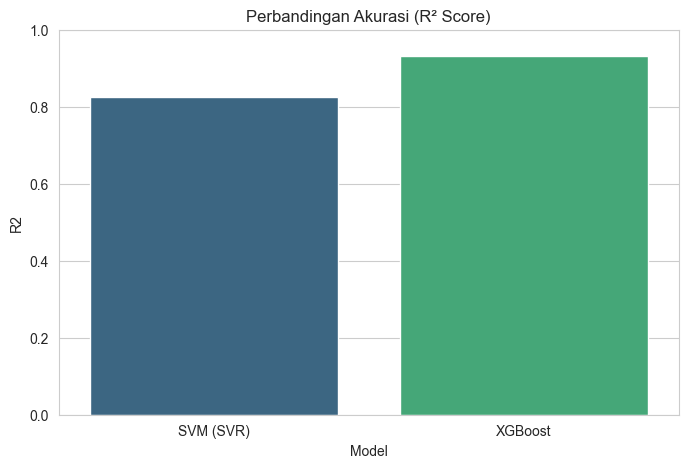

In [5]:
# Membuat DataFrame perbandingan
df_results = pd.DataFrame(results)
display(df_results)

# Visualisasi Perbandingan R2 Score
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R2', data=df_results, palette='viridis')
plt.title('Perbandingan Akurasi (R² Score)')
plt.ylim(0, 1)
plt.show()

C:\Users\shaadam Haidar Yuwon\AppData\Local\Temp\ipykernel_17856\1810716434.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importance, palette='magma')


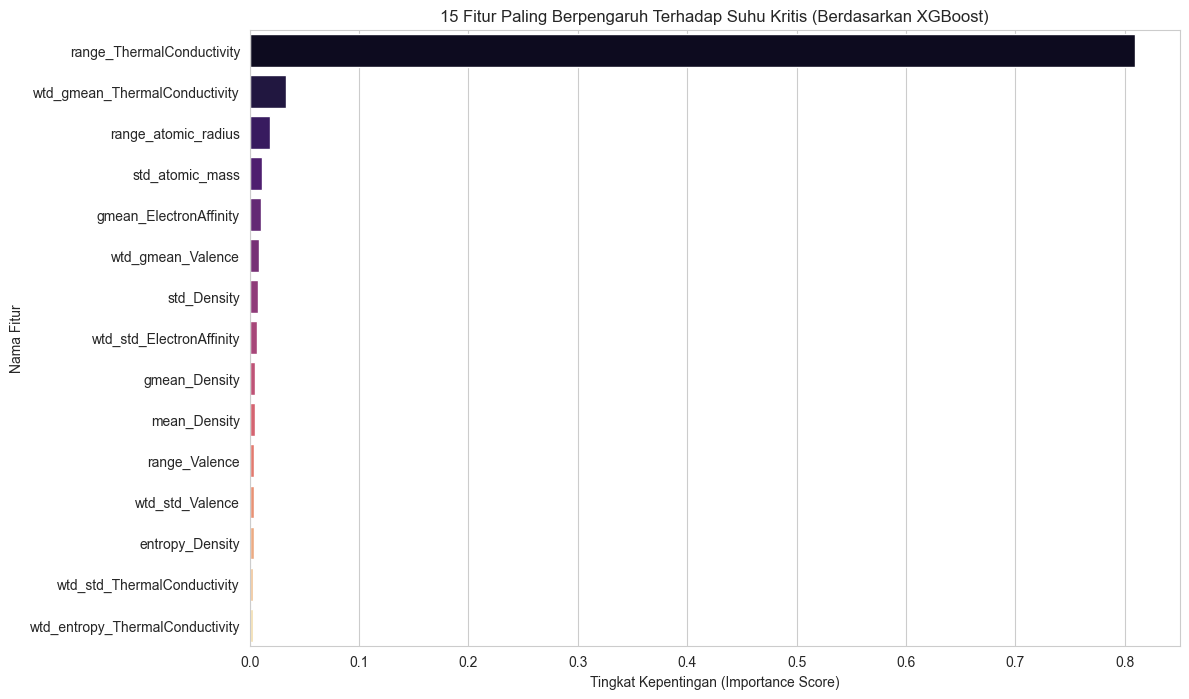

Fitur paling dominan:
['range_ThermalConductivity' 'wtd_gmean_ThermalConductivity'
 'range_atomic_radius' 'std_atomic_mass' 'gmean_ElectronAffinity']


In [6]:
# Mengambil feature importance dari XGBoost
importance = xgb_model.feature_importances_
feature_names = X.columns

# Membuat DataFrame untuk visualisasi
df_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
df_importance = df_importance.sort_values(by='Importance', ascending=False).head(15) # Top 15 Fitur

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='magma')
plt.title('15 Fitur Paling Berpengaruh Terhadap Suhu Kritis (Berdasarkan XGBoost)')
plt.xlabel('Tingkat Kepentingan (Importance Score)')
plt.ylabel('Nama Fitur')
plt.show()

print("Fitur paling dominan:")
print(df_importance['Feature'].head(5).values)